In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [3]:
np.random.seed(42)

In [4]:
df=pd.read_csv('df_PCA.csv',delimiter=',')
df.head()

,customer_id,PC0,PC1,PC2,PC3,PC4,PC5,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_no_promotion_used,payment_method_CASH,payment_method_DIGI
0,1b8f824d5e,0.136414,0.000248,0.591799,0.789285,0.054109,0.422382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5d272b9dcb,0.136332,0.000000,0.594984,0.801680,0.036851,0.205378,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,f6d1b2ba63,0.214315,0.021475,0.301219,0.871834,0.354534,0.216267,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,180c632ed8,0.141628,0.006605,0.597401,0.797470,0.174912,0.282334,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4eb37a6705,0.141919,0.006840,0.597255,0.787897,0.085252,0.446357,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [5]:
df.set_index('customer_id',inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30554 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PC0                           30554 non-null  float64
 1   PC1                           30554 non-null  float64
 2   PC2                           30554 non-null  float64
 3   PC3                           30554 non-null  float64
 4   PC4                           30554 non-null  float64
 5   PC5                           30554 non-null  float64
 6   customer_region_2440          30554 non-null  float64
 7   customer_region_2490          30554 non-null  float64
 8   customer_region_4140          30554 non-null  float64
 9   customer_region_4660          30554 non-null  float64
 10  customer_region_8370          30554 non-null  float64
 11  customer_region_8550          30554 non-null  float64
 12  customer_region_8670          30554 non-null  float

In [7]:
metric_features=df.columns

In [10]:
cluster_range = range(25, 60)

# Lists to store evaluation metrics
inertia = []
avg_silhouette = []

# Iterate over the range of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
    cluster_labels = kmeans.fit_predict(df)

    # Compute and store Inertia
    inertia.append(kmeans.inertia_)

    # Compute and store Average Silhouette Score
    silhouette_avg = silhouette_score(df, cluster_labels)
    avg_silhouette.append(silhouette_avg)


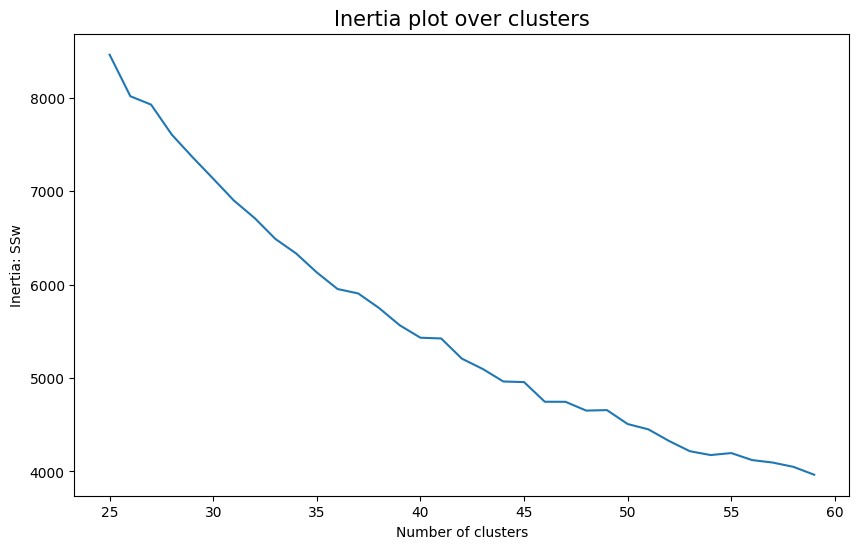

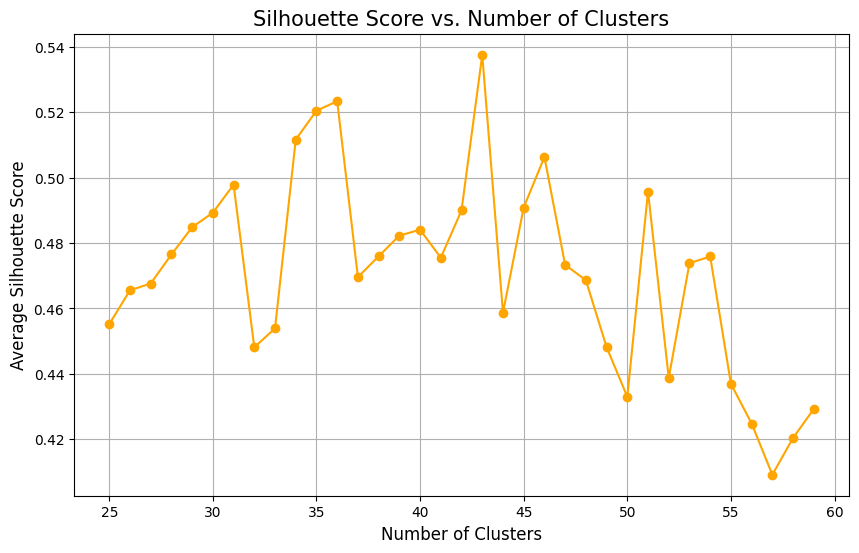

In [11]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

# Plot Average Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, avg_silhouette, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Average Silhouette Score", size=12)
plt.grid(True)
plt.show()

In [13]:
kmeans = KMeans(n_clusters=43, random_state=42)
kmeans_labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_

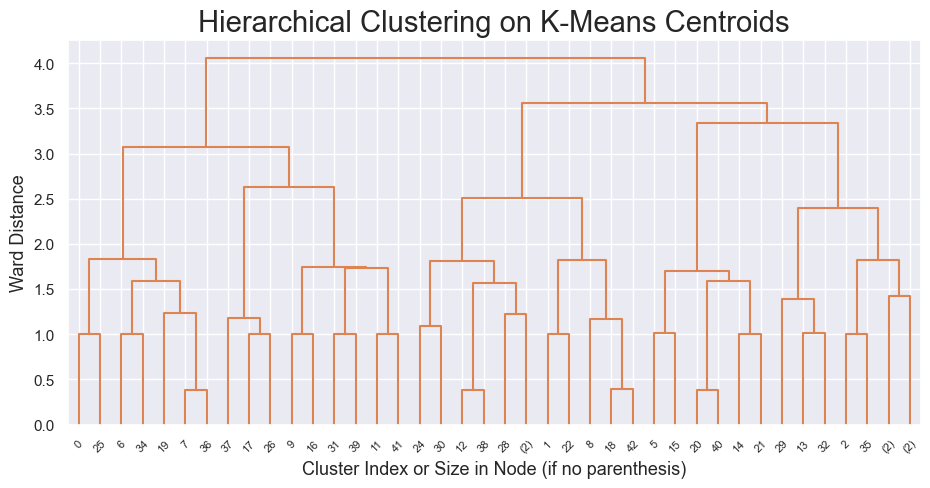

In [24]:
hclust = AgglomerativeClustering(
    n_clusters=None,  # Specify `None` to build the hierarchy fully
    distance_threshold=0,  # Build the dendrogram to include all merges
    linkage="ward"
)

hclust.fit(centroids)

# Prepare variables
n_samples = len(centroids)
counts = np.zeros(hclust.children_.shape[0], dtype=int)

# Calculate counts for each merge
for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # Leaf node (centroid)
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# Create linkage matrix for dendrogram
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Step 3: Plot the Dendrogram
sns.set()
fig = plt.figure(figsize=(11, 5))

# Dendrogram settings
y_threshold = 100  # Adjust this based on your data's distance scale
dendrogram(
    linkage_matrix,
    truncate_mode="level",  # Show clusters up to a certain depth
    p=5,  # Number of levels to show
    color_threshold=y_threshold,  # Coloring based on threshold
    above_threshold_color="k"  # Default color above the threshold
)

# Highlight the threshold
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")

# Titles and labels
plt.title("Hierarchical Clustering on K-Means Centroids", fontsize=21)
plt.xlabel("Cluster Index or Size in Node (if no parenthesis)", fontsize=13)
plt.ylabel("Ward Distance", fontsize=13)
plt.show()

In [25]:
hclust = AgglomerativeClustering(
    n_clusters=7,  # Specify the desired number of clusters
    linkage="ward"
)

hierarchical_labels = hclust.fit_predict(centroids)

In [26]:
hierarchical_labels

array([1, 4, 0, 2, 0, 3, 1, 1, 4, 6, 0, 6, 2, 0, 3, 3, 6, 5, 4, 1, 3, 3,
       4, 2, 2, 1, 5, 0, 2, 0, 2, 6, 0, 0, 1, 0, 1, 5, 2, 6, 3, 6, 4])